## **Computer Vision**

## **Problem Statement: Automated Diagnosis of Diabetic Retinopathy**

### **Background**
Diabetic Retinopathy (DR) is a serious complication of diabetes that damages the retina, potentially leading to vision loss. With the rising prevalence of diabetes, DR has become a significant public health concern. Early detection and timely intervention are vital for preventing severe vision impairment and improving patient outcomes. However, the current methods of diagnosing DR through manual interpretation of retinal images are labor-intensive and prone to human error, making them inefficient and inconsistent.

### **Objective**
The goal is to develop an automated and accurate tool for diagnosing Diabetic Retinopathy using retinal images. This tool should assist healthcare professionals by providing consistent and reliable grading of DR severity, thus facilitating early intervention and personalized treatment plans.

### Dataset Description
The dataset comprises a large collection of high-resolution retinal images captured under various imaging conditions. Each image has been assessed by a medical professional, who determined the presence of Diabetic Retinopathy and assigned a binary rating:
- 0: Diabetic Retinopathy
- 1: No Diabetic Retinopathy

### **Challenges**
1. **Subjectivity and Manual Labor:** Current methods rely on subjective assessments, which can lead to inconsistencies and inefficiencies.
2. **Increasing Prevalence:** The rising number of diabetes cases and the limited availability of ophthalmologists exacerbate the need for timely and accurate screening.
3. **Imaging Variability:** The dataset includes images captured under different conditions, which may affect the consistency of the automated diagnosis.

### **Solution**
To address these challenges, an automated system utilizing advanced machine learning techniques will be developed. This system aims to:
- Accurately detect and grade Diabetic Retinopathy from retinal images.
- Provide consistent and reliable results, reducing the dependence on subjective human interpretation.
- Enable early detection and intervention, improving patient outcomes.

### **Impact**
Implementing an automated DR diagnosis system will streamline the screening process, reduce the workload on healthcare professionals, and ensure timely and accurate diagnosis. This will ultimately lead to better management of Diabetic Retinopathy and improved vision health for patients with diabetes.

In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from pathlib import Path
import random

In [6]:
# Set seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
data_root_path = '/content/drive/My Drive/Diabetic_Retinopathy/train'
total_classes = os.listdir(data_root_path)
print(total_classes)

['DR', 'No_DR']


In [9]:
# Load images and labels
def load_data(data_path):
    images = []
    labels = []
    for label, category in enumerate(total_classes):
        category_path = Path(data_path) / category
        for image_path in category_path.glob('*.jpg'):
            img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

In [10]:
X, y = load_data(data_root_path)
print(f'Total images: {len(X)}, Total labels: {len(y)}')

Total images: 2076, Total labels: 2076


In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

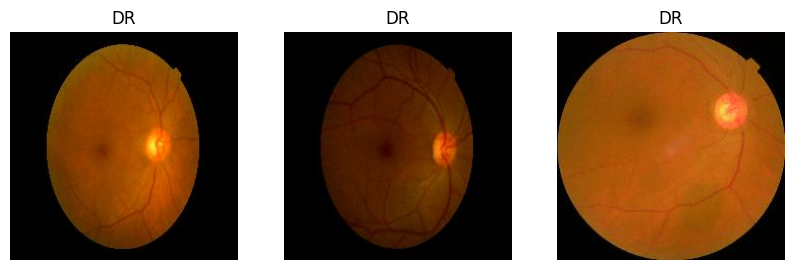

In [13]:
# Identify the class label for DR
DR_label = 1

# Filter images belonging to the DR class
DR_indices = np.where(y_train == DR_label)[0]

plt.figure(figsize=(10, 10))
for i in range(3):
  ax = plt.subplot(1, 3, i + 1)
  plt.imshow(X_train[DR_indices[i]])
  plt.title("DR")
  plt.axis("off")

plt.show()


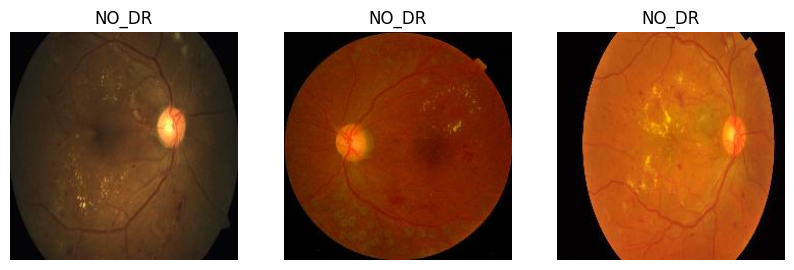

In [14]:
# Identify the class label for NO_DR
NO_DR_label = 0

# Filter images belonging to the NO_DR class
NO_DR_indices = np.where(y_train == NO_DR_label)[0]


plt.figure(figsize=(10, 10))
for i in range(3):
  ax = plt.subplot(1, 3, i + 1)
  plt.imshow(X_train[NO_DR_indices[i]])
  plt.title("NO_DR")
  plt.axis("off")
plt.show()


In [15]:
#Use LabelEncoder to encode Labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [20]:
#Define the CNN Model

model = Sequential ([
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [21]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Data Augmentation and Training

We will use data augmentation to improve the generalization of our model and then train it

In [22]:
#Fit model
history = model.fit(X_train, y_train, batch_size=16, epochs=10, validation_data=(X_test, y_test), verbose = 1)

Epoch 1/10
104/104 [==============================] - 786s 7s/step - loss: 0.3032 - accuracy: 0.8741 - val_loss: 0.2288 - val_accuracy: 0.9135
Epoch 2/10
104/104 [==============================] - 772s 7s/step - loss: 0.2217 - accuracy: 0.9145 - val_loss: 0.2351 - val_accuracy: 0.9183
Epoch 3/10
104/104 [==============================] - 769s 7s/step - loss: 0.2180 - accuracy: 0.9175 - val_loss: 0.2239 - val_accuracy: 0.9183
Epoch 4/10
104/104 [==============================] - 774s 7s/step - loss: 0.2018 - accuracy: 0.9307 - val_loss: 0.2325 - val_accuracy: 0.9111
Epoch 5/10
104/104 [==============================] - 774s 7s/step - loss: 0.2029 - accuracy: 0.9349 - val_loss: 0.2349 - val_accuracy: 0.9159
Epoch 6/10
104/104 [==============================] - 773s 7s/step - loss: 0.1813 - accuracy: 0.9422 - val_loss: 0.2148 - val_accuracy: 0.9135
Epoch 7/10
104/104 [==============================] - 770s 7s/step - loss: 0.1841 - accuracy: 0.9398 - val_loss: 0.2181 - val_accuracy: 0.9183

Evaluate the model

We will evaluate the model on the test set to see how well it performs.

In [23]:
#Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy * 100: 0.2f}%")

13/13 [==============================] - 52s 4s/step - loss: 0.2163 - accuracy: 0.9183
Test Accuracy:  91.83%


Visualize Training History

We will plot the training and validation accuracy and loss over the epochs.

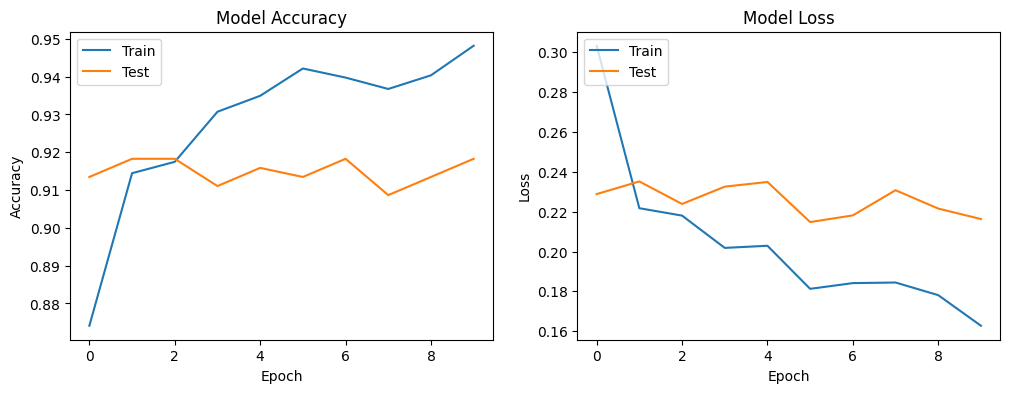

In [24]:
#Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

Visualize Model Predictions

We will visualize some predictions from the test set.

13/13 [==============================] - 62s 5s/step


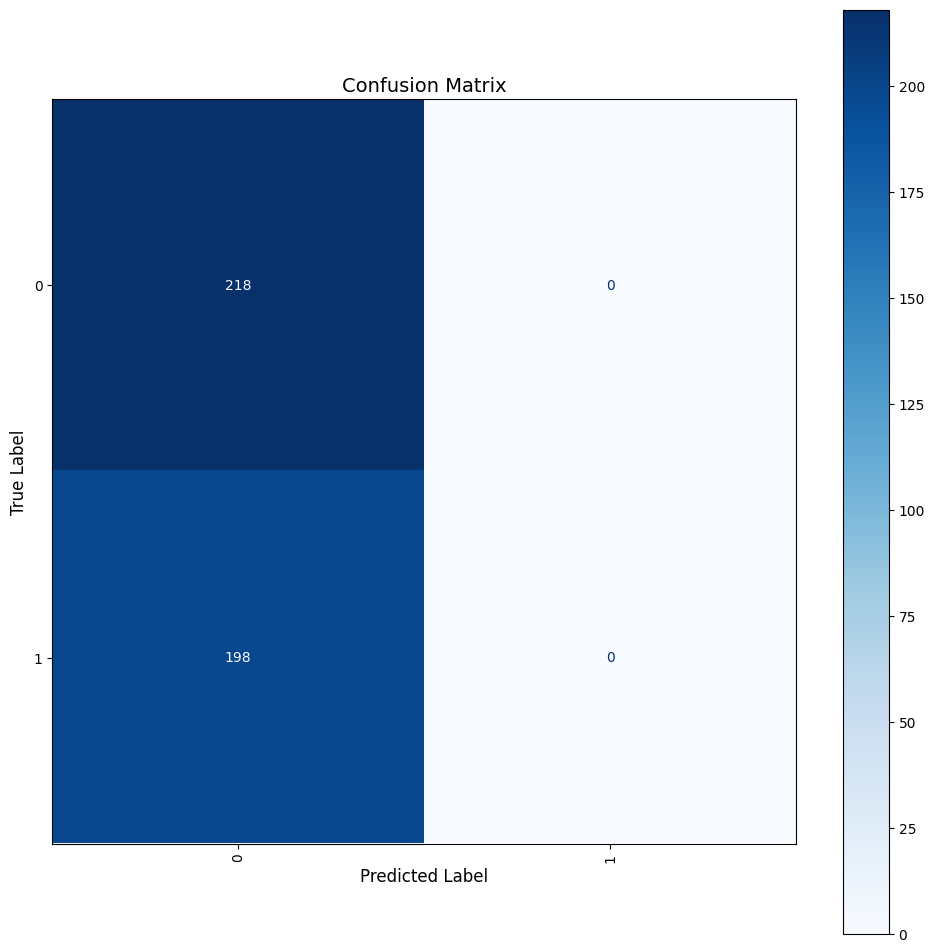

In [28]:
#Predicting on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

#Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)


#The plot size
plt.figure(figsize=(12, 12))
disp.plot(cmap=plt.cm.Blues, ax=plt.gca(), xticks_rotation='vertical')

#Font sizes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)

plt.show()

In [30]:
model.save('retinal_cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
